 phi notation/formula:

πs1s2=p1*p2 : Probability of non failure of either system with probability 

πs1=p1*(1-p2) : Probability of failure of only system s2 

πs2=p2*(1-p1) : Probability of failure of only system s1

PMs1s2 : The experiemental measurement sucess probaility on the two systems

PMs1 : The experiemental measurement sucess probaility on the system s1

PMs2 : The experiemental measurement sucess probaility on the system s2

Pcl :  classical treshold



phi = πs1s1*(PMs1s2-Pcl) + πs1(PMs1-Pcl) + πs2(PMs2-Pcl)

In [1]:
shiftWDM=12
shift1=2100 +shiftWDM  #IM2
shift2=2072 +shiftWDM  #PM
tw=200e-12

# d=2 State 00

## Power 

In [2]:
import numpy as np
#pdbm=([[0],[-38.20],[-15.71],[-14.03],[-13.13],[-12.08],[-30.06],[-25.09],[-20.28],[-10.03],[-9.62],[-11.05]])
pdbm=([[-24.46],[-21.06],[-18.79],[-16.64],[-15.15],[-13.90],[-11.58],[-10.25],[-8.52],[-6.7],[-4.20],[-2.28],[-1.84]])
pdbm=np.asarray(pdbm)
pdbm=pdbm-13
pdbm=pdbm.transpose()
pdbm

array([[-37.46, -34.06, -31.79, -29.64, -28.15, -26.9 , -24.58, -23.25,
        -21.52, -19.7 , -17.2 , -15.28, -14.84]])

## Phi 

In [62]:
phi2=[]

In [63]:
dim=2
Pcl2=0.5*(1+(1/dim))

In [20]:
#00
import numpy as np
import os
path =r'C:\Users\Utilisateur\Documents\Mes études\Stage QTI\florq\time\00(2)\13'
list_of_files = []
timestamps=[]
channels=[]
for root, dirs, files in os.walk(path):
    for file in files:
        if file.startswith("Tags") and file.endswith("npz"):
            list_of_files.append(os.path.join(root,file))
for i in (list_of_files):
    file=np.load('%s'%i)
    timestamps=np.concatenate((timestamps,file['timeStamps']))
    channels=np.concatenate((channels,file['channels']))
    
time=len(np.where(timestamps[channels==104])[0])/1000

clicks=timestamps[np.where(channels==1)[0]]
clicks2=clicks*1e-12-250e-12
hist_bin = 2**12-1#2**(13)-2
slot = 1/145358 #s #6.8796e-6
bit_width = slot/hist_bin #s #1.68e-9
clicksmod=np.mod(clicks2, bit_width)
clickspos=np.divide(clicks2,bit_width/2)
clickspos=np.asarray(clickspos, dtype='int')

import numpy as np
from scipy.io import loadmat
prbs=loadmat('prbs_12.mat')['prbs'][0]
prbs=np.asarray(prbs)
prbs_original=np.concatenate([prbs,prbs])
#IM2
prbs=np.roll(prbs_original,shift1) #2060
goodpos=[]
for i in range (len(prbs)-1):
        if (prbs[i]==1):#==0
            if (prbs[i+1]==0) and i%2==shift1%2:#==1
                goodpos.append(i)                           
prbs=np.roll(prbs_original,shift2) #2060
goodpos2=[]
for i in range (len(prbs)-1):
    if (prbs[i]==1):#==0
        if (prbs[i+1]==0) and i%2==shift2%2:#==1
            goodpos2.append(i)
goodpos=np.asarray(goodpos)
goodpos2=np.asarray(goodpos2)
state=goodpos[np.isin(goodpos,goodpos2)]

seq=np.zeros(8190)
for i in range (8190):
    seq[i]=2
for i in state:
    seq[i]=1
    seq[i+1]=0
clicksmod=clicksmod[np.isin(clickspos,np.where(seq!=2)[0])]
h2=np.histogram(clicksmod,50)

max1=np.argmax(h2[0][:25])
max2=np.argmax(h2[0][25:])+25

#filter

fil1_1=h2[1][max1]-tw/2
fil1_2=h2[1][max1]+tw/2
fil2_1=h2[1][max2]-tw/2
fil2_2=h2[1][max2]+tw/2

a=len(np.where(np.bitwise_and(clicksmod >= fil1_1, clicksmod <= fil1_2))[0]) #maximum
b=len(np.where(np.bitwise_and(clicksmod >= fil2_1, clicksmod <= fil2_2))[0]) #minimum


M1=a/(a+b)
phi2.append([(1-M1)*(M1-Pcl2)])
phi2

[[0.014155683394473624],
 [0.01442262364857534],
 [0.012393538828295338],
 [0.011221383399471978],
 [0.008816806322411743],
 [0.008414286928420004],
 [-0.0006183021107459021],
 [-0.005962990401746948],
 [-0.020267023006971672],
 [-0.030172875735579054],
 [-0.05693144548630281],
 [-0.0749432735372648],
 [-0.08158429791973885]]

# d = 4 State 00

## Power 

In [20]:
import numpy as np
pdbm4=([[-24.27],[-21.27],[-18.64],[-16.64],[-15.32],[-13.92],[-11.56],[-10.6],[-8.48],[-6.77],[-4.46],[-2.25],[-1.85]])
pdbm4=np.asarray(pdbm4)
pdbm4=pdbm4-13
pdbm4=pdbm4.transpose()
pdbm4

array([[-37.27, -34.27, -31.64, -29.64, -28.32, -26.92, -24.56, -23.6 ,
        -21.48, -19.77, -17.46, -15.25, -14.85]])

## Find position of the maximums 

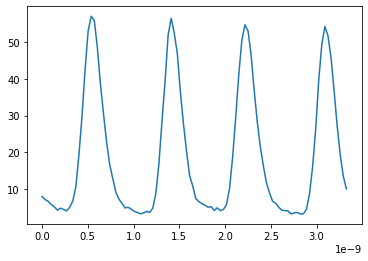

In [2]:
#00
import numpy as np
import os
path =r'C:\Users\Utilisateur\Documents\Mes études\Stage QTI\florq\22july\time\alwayspulse'
list_of_files = []
timestamps=[]
channels=[]
for root, dirs, files in os.walk(path):
    for file in files:
        if file.startswith("Tags") and file.endswith("npz"):
            list_of_files.append(os.path.join(root,file))
for i in (list_of_files):
    file=np.load('%s'%i)
    timestamps=np.concatenate((timestamps,file['timeStamps']))
    channels=np.concatenate((channels,file['channels']))
    
time=len(np.where(timestamps[channels==104])[0])/1000
clicks=timestamps[np.where(channels==1)[0]]
clicks2=clicks*1e-12-250e-12
hist_bin = 2**12-1#2**(13)-2
slot = 1/145358 #s #6.8796e-6
bit_width = slot/hist_bin #s #1.68e-9
clicksmod=np.mod(clicks2, 2*bit_width)
clickspos=np.divide(clicks2,bit_width/2)
clickspos=np.asarray(clickspos, dtype='int')
import numpy as np
from scipy.io import loadmat
prbs=loadmat('prbs_12.mat')['prbs'][0]
prbs=np.asarray(prbs)
prbs_original=np.concatenate([prbs,prbs])
#IM2
prbs=np.roll(prbs_original,shift1) #2060
goodpos=[]
for i in range (len(prbs)-1):
        if (prbs[i]==1):#==0
            if (prbs[i+1]==0) and i%2==shift1%2:#==1
                goodpos.append(i)                           
prbs=np.roll(prbs_original,shift2) #2060
goodpos2=[]
for i in range (len(prbs)-1):
    if (prbs[i]==1):#==0
        if (prbs[i+1]==0) and i%2==shift2%2:#==1
            goodpos2.append(i)
goodpos=np.asarray(goodpos)
goodpos2=np.asarray(goodpos2)
state=goodpos[np.isin(goodpos,goodpos2)]

seq=np.zeros(8190)
for i in range (8190):
    seq[i]=2
for i in state:
    seq[i]=1
    seq[i+1]=0

h2=np.histogram(clicksmod[np.isin(clickspos,np.where(seq!=2)[0])],100)

import matplotlib.pyplot as plt
plt.plot(h2[1][:100],h2[0]/time)

In [3]:
max1=np.argmax(h2[0][:25])
max2=np.argmax(h2[0][25:50])+25
max3=np.argmax(h2[0][50:75])+50
max4=np.argmax(h2[0][75:100])+75
max1

16

## Phi

In [4]:
phi4=[]
A12=[]
A1=[]
A2=[]

In [17]:
#00
import numpy as np
import os
path =r'C:\Users\Utilisateur\Documents\Mes études\Stage QTI\florq\22july\time\13'
list_of_files = []
timestamps=[]
channels=[]
for root, dirs, files in os.walk(path):
    for file in files:
        if file.startswith("Tags") and file.endswith("npz"):
            list_of_files.append(os.path.join(root,file))
for i in (list_of_files):
    file=np.load('%s'%i)
    timestamps=np.concatenate((timestamps,file['timeStamps']))
    channels=np.concatenate((channels,file['channels']))
    
timeg=len(np.where(timestamps[channels==104])[0])/1000
clicks=timestamps[np.where(channels==1)[0]]
clicks2=clicks*1e-12-250e-12
hist_bin = 2**12-1#2**(13)-2
slot = 1/145358 #s #6.8796e-6
bit_width = slot/hist_bin #s #1.68e-9
clicksmod=np.mod(clicks2, 2*bit_width)
clickspos=np.divide(clicks2,bit_width/2)
clickspos=np.asarray(clickspos, dtype='int')
import numpy as np
from scipy.io import loadmat
prbs=loadmat('prbs_12.mat')['prbs'][0]
prbs=np.asarray(prbs)
prbs_original=np.concatenate([prbs,prbs])
#IM2
prbs=np.roll(prbs_original,shift1) #2060
goodpos=[]
for i in range (len(prbs)-1):
        if (prbs[i]==1):#==0
            if (prbs[i+1]==0) and i%2==shift1%2:#==1
                goodpos.append(i)                           
prbs=np.roll(prbs_original,shift2) #2060
goodpos2=[]
for i in range (len(prbs)-1):
    if (prbs[i]==1):#==0
        if (prbs[i+1]==0) and i%2==shift2%2:#==1
            goodpos2.append(i)
goodpos=np.asarray(goodpos)
goodpos2=np.asarray(goodpos2)
state=goodpos[np.isin(goodpos,goodpos2)]

seq=np.zeros(8190)
for i in range (8190):
    seq[i]=2
for i in state:
    seq[i]=1
    seq[i+1]=0
    
h2g=np.histogram(clicksmod[np.isin(clickspos,np.where(seq!=2)[0])],100)


#filter
tw=200e-12
fil1_1=h2g[1][max1]-tw/2
fil1_2=h2g[1][max1]+tw/2
fil2_1=h2g[1][max2]-tw/2
fil2_2=h2g[1][max2]+tw/2
fil3_1=h2g[1][max3]-tw/2
fil3_2=h2g[1][max3]+tw/2
fil4_1=h2g[1][max4]-tw/2
fil4_2=h2g[1][max4]+tw/2

a=len(np.where(np.bitwise_and(clicksmod >= fil1_1, clicksmod <= fil1_2))[0])
b=len(np.where(np.bitwise_and(clicksmod >= fil2_1, clicksmod <= fil2_2))[0])
c=len(np.where(np.bitwise_and(clicksmod >= fil3_1, clicksmod <= fil3_2))[0])
d=len(np.where(np.bitwise_and(clicksmod >= fil4_1, clicksmod <= fil4_2))[0])

#ags
M12=a/(a+b+c+d)
M1=(a+b)/(a+b+c+d)
M2=(a+c)/(a+b+c+d)

dim=4
pcl4=0.5*(1+(1/dim))

phi4.append([(1-M12)*(M12-pcl4)+(1-M1)*(M1-pcl4)+(1-M2)*(M2-pcl4)])
# allocation data
A12.append([M12-pcl4])
A1.append([M1-pcl4])
A2.append([M2-pcl4])
phi4

[[0.0999677530528239],
 [0.09875671249456902],
 [0.09542768293378795],
 [0.09044759326581828],
 [0.08555712354817624],
 [0.077887222978822],
 [0.0537115317892827],
 [0.03854256858033672],
 [-0.006265441502126726],
 [-0.06105261570680312],
 [-0.13866690947330146],
 [-0.22264442802755965],
 [-0.23597306506119528]]

# Scheme

In [38]:
phi2=np.array(phi2)
phi22=phi2.transpose()
phi22

array([[ 0.01415568,  0.01442262,  0.01239354,  0.01122138,  0.00881681,
         0.00841429, -0.0006183 , -0.00596299, -0.02026702, -0.03017288,
        -0.05693145, -0.07494327, -0.0815843 ]])

In [39]:
phi4=np.array(phi4)
phi44=phi4.transpose()
phi44

array([[ 0.09996775,  0.09875671,  0.09542768,  0.09044759,  0.08555712,
         0.07788722,  0.05371153,  0.03854257, -0.00626544, -0.06105262,
        -0.13866691, -0.22264443, -0.23597307]])

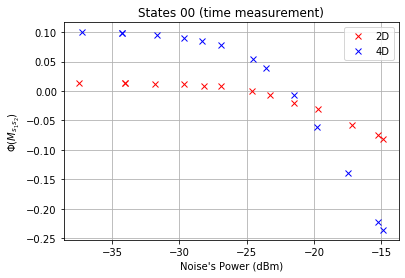

In [61]:
import matplotlib.pyplot as plt
#pW=pW[0]
#timeplot=np.asarray(timeplot, dtype='float')[0]
plt.plot(pdbm[0], phi22[0],'rx')
plt.plot(pdbm[0][1], phi22[0][1], 'rx', label='2D')
plt.plot(pdbm4[0], phi44[0], 'bx')
plt.plot(pdbm4[0][1], phi44[0][1], 'bx', label='4D')

plt.xlabel("Noise's Power (dBm)")
plt.ylabel("$\Phi(M_{s_1s_2})$")
#plt.axhline(y=0.625, color='b', linestyle='--', label='classic 4D')
#plt.axhline(y=0.75, color='r', linestyle='--', label='classic 2D')
plt.title("States 00 (time measurement)")
#plt.axhline(y=0, color='black',  linestyle=':')
#plt.axhline(y=0.75, color='r',  linestyle=':', label='2D Classical threshold')
plt.legend()
plt.grid()
plt.savefig("phi.png")

In [35]:
#SCHEME allocation value A12, A1, A2
A12=np.array(A12)
A122=A12.transpose()
A1=np.array(A1)
A11=A1.transpose()
A2=np.array(A2)
A22=A2.transpose()
A22

array([[0.19888042, 0.19358127, 0.18329599, 0.17102426, 0.1615371 ,
        0.148879  , 0.11705741, 0.1015334 , 0.06363211, 0.02654494,
        0.        , 0.        , 0.        ]])

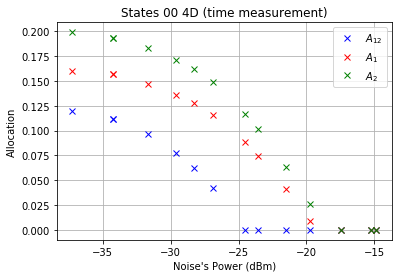

In [36]:
import matplotlib.pyplot as plt
plt.plot(pdbm4[0],A122[0], 'bx')
plt.plot(pdbm4[0][1], A122[0][1], 'bx', label='$A_{12}$')
plt.plot(pdbm4[0],A11[0], 'rx')
plt.plot(pdbm4[0][1], A11[0][1], 'rx', label='$A_{1}$')
plt.plot(pdbm4[0],A22[0], 'gx')
plt.plot(pdbm4[0][1], A22[0][1], 'gx', label='$A_{2}$')

plt.xlabel("Noise's Power (dBm)")
plt.ylabel("Allocation")
#plt.axhline(y=0.625, color='b', linestyle='--', label='classic 4D')
#plt.axhline(y=0.75, color='r', linestyle='--', label='classic 2D')
plt.title("States 00 4D (time measurement)")
#plt.axhline(y=0, color='black',  linestyle=':')
#plt.axhline(y=0.75, color='r',  linestyle=':', label='2D Classical threshold')
plt.legend()
plt.grid()
plt.savefig("allocation.png")